In [15]:
# Baseline regression model

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [16]:
X = data.data
y = data.target

In [19]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyRegressor

dum = DummyRegressor(strategy="mean")

In [20]:
dum.fit(X, y)

DummyRegressor()

In [21]:
dum.score(X,y)

0.0

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [27]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42)

In [25]:
X_train[:2]

array([[   4.2143    ,   37.        ,    5.28823529,    0.97352941,
         860.        ,    2.52941176,   33.81      , -118.12      ],
       [   5.3468    ,   42.        ,    6.36432161,    1.0879397 ,
         957.        ,    2.40452261,   37.16      , -121.98      ]])

In [26]:
sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

-8.898645664618989e+28

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgd_pipe = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('sgd_regressor', sgd)
])

In [29]:
sgd_pipe.fit(X_train, y_train)
sgd_pipe.score(X_test, y_test)

0.5575675204362442

In [31]:
sgd_pipe

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('sgd_regressor', SGDRegressor(random_state=42))])

## Learning rate in SGD

- constant: 
$$
eta=eta0
$$

- invscaling:
$$
eta = \dfrac{eta0}{pow(t, power\_t)}
$$

- adaptive: constant till no change in training loss. Divide by 5 after that, till the stopping criterion is reached

- optimal (out of syllabus)

***

- One epoch is passing the entire training set once. 
- ```max_iter``` defined the number of epochs. Default 1000

## Stopping criteria

### Option 1: ```tol```, ```n_iter_no_change```, ```max_iter```

- SGD stops when:
    - EITHER: (loss>best_loss-tol) for ```n_iter_no_change``` consecutive epochs
    - OR: ```max_iter``` is reached

### Option 2: ```early_stopping```, ```validation_fraction```

- SGD stops when:
    - EITHER: validation score does not change by at least ```tol``` for ```n_iter_no_change``` consecutive epochs
    - OR: max_iter is reached

In [33]:
np.mean(sgd.coef_)

-0.08694096995987144

## Avg SGD

- average=True
    - Starts avg from the beginning

or
- average=10
    - Starts avg after seeing 10 samples

In [36]:
sgd.coef_

array([ 0.83264178,  0.12498833, -0.25255367,  0.4110813 ,  0.00160827,
       -0.05168275, -0.88794249, -0.87366852])

In [37]:
sgd.intercept_

array([2.05443863])

***
- Mean absolute error
- Mean squared error
- R2 score
- Mean squared log error
- Mean absolute percentage error
- Median absolute error
- Max error

***

- Score: higher the better
- Error: lower the better

- add ```neg_*``` in front of the error to get score



***
***
1. train_test_split
2. CountVectorizer
3. StandardScaler
4. RandomForestClassifier
5. PCA
6. GridSearchCV
7. KMeans
8. LabelEncoder
9. DecisionTreeRegressor
10. SVM
11. OneHotEncoder
12. LogisticRegression
13. Pipeline
14. KFold
15. MinMaxScaler
16. Ridge
17. GradientBoostingClassifier
18. TfidfVectorizer
19. KFold
20. StratifiedKFold


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# kfold again
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

## Poly features

PolynomialFeatures(degree=2)
$$
[x_1, x_2] \rightarrow [1,x_1, x_2, x_1^2, x_2^2, x_1x_2]
$$

PolynomialFeatures(degree=2, interaction_only=True)

$$
[x_1, x_2] \rightarrow [1, x_1, x_2, x_1x_2]
$$

PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)

$$
[x_1, x_2] \rightarrow [x_1, x_2, x_1x_2]
$$



In [47]:
measurements = [
           {'city': 'Chennai', 'temperature': 33.},
           {'city': 'Kolkata', 'temperature': 18.},
           {'city': 'Delhi', 'temperature': 12.}]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
vec.fit_transform(measurements).toarray()
vec.get_feature_names_out()

array(['city=Chennai', 'city=Delhi', 'city=Kolkata', 'temperature'],
      dtype=object)

In [49]:
X_new = vec.fit_transform(measurements)


X_new.toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  0.,  1., 18.],
       [ 0.,  1.,  0., 12.]])

In [54]:
SGDRegressor(n_iter_=500)

TypeError: __init__() got an unexpected keyword argument 'n_iter_'

In [55]:
SGDRegressor(n_iter=500)

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [57]:
sgd = SGDRegressor(max_iter=500)

In [59]:
sgd.n_iter_

AttributeError: 'SGDRegressor' object has no attribute 'n_iter_'

In [60]:
sgd.n_iter

AttributeError: 'SGDRegressor' object has no attribute 'n_iter'

In [58]:
sgd.max_iter

500

In [66]:
sgd.fit(X_train, y_train)


SGDRegressor(max_iter=500)

In [67]:
sgd.n_iter_

57

In [53]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('classifier', LogisticRegression())
])


param_grid = param_grid = param_grid = {'classifier__C': [0.1, 1, 10]}

model = GridSearchCV(
       pipeline,
       param_grid=param_grid).fit(X, y)
model.best_params_

{'classifier__C': 10}

In [64]:
from sklearn.model_selection import GridSearchCV

params = {'eta0': [0.1,0.001]}

estimator = SGDRegressor(learning_rate='constant').fit(X_train, y_train)

gs = GridSearchCV(estimator, param_grid=params)

gs.fit(X_train, y_train)


GridSearchCV(estimator=SGDRegressor(learning_rate='constant'),
             param_grid={'eta0': [0.1, 0.001]})

SGDRegressor(learning_rate='constant')

In [68]:
?np.random.randn

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I

In [71]:
np.random.randn(2,5)

array([[ 2.13084342, -0.14009852, -0.21535244, -0.84826351,  1.69336866],
       [ 1.26349111, -0.91087169, -2.20539163, -0.81790878,  0.388666  ]])

In [85]:
from sklearn.metrics import max_error

y_true = np.array([2,2,2,1])
y_pred = np.array([3,5,7,5])

max_error(y_true, y_pred)

5

In [75]:
max_error(y_pred, y_true)

5

In [1]:
import numpy as np
import pandas as pd

data = {
    "x": [1, np.nan, 2],
    "y": [13, np.nan, 20],
    "z": [144, np.nan, 21],
    "t": [11, 5, 23],
}

df = pd.DataFrame(data)


In [3]:
df

,x,y,z,t
0,1.0,13.0,144.0,11
1,NaN,NaN,NaN,5
2,2.0,20.0,21.0,23


In [9]:
df.dropna(thresh=2, axis=0)

,x,y,z,t
0,1.0,13.0,144.0,11
2,2.0,20.0,21.0,23


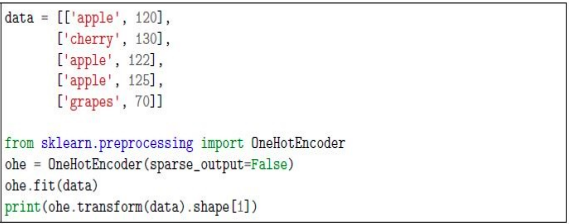

In [11]:
data = [
    ['a', 120],
    ['c', 130],
    ['a', 122],
    ['a', 125],
    ['g', 70],
]

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(data)

print((ohe.transform(data).shape[1]))

8


In [12]:
ohe.transform(data)

array([[1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.]])

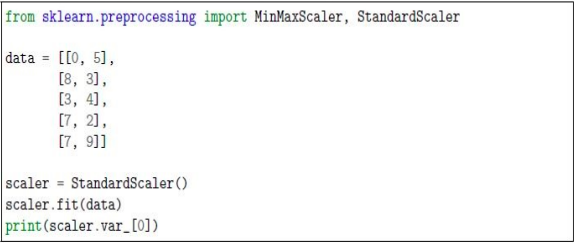

In [13]:
from sklearn.preprocessing import StandardScaler

data = [
    [0,5],
    [8,3],
    [3,4],
    [7,1],
    [7,9]
]

scaler = StandardScaler()
scaler.fit(data)



StandardScaler()

In [14]:
scaler.var_

array([9.2 , 7.04])

In [15]:
np.var(data)

8.209999999999999

In [25]:
np.array([0,8,3,7,7]).var()


9.2

In [27]:
np

<module 'numpy' from '/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/numpy/__init__.py'>

Final course score T = 0.1GAA + 0.3F+ +0.15OPE1 + 0.15OPE2+ Max(0.15Qz1 + 0.15Qz2, 0.2max(Qz1,Qz2))



# Course marks

Final course score T = 0.1GAA + 0.3F+ +0.15OPE1 + 0.15OPE2+ Max(0.15Qz1 + 0.15Qz2, 0.2max(Qz1,Qz2))



In [4]:
GAA = 100
F = 87
OPE1 = 92
OPE2 = 92
Qz1 = 65
Qz2 = 76
Q1 = max(0.15*OPE1 + 0.15*OPE2, 0.3*( max(OPE1, OPE2) ))
Q2 = 0.2*max(Qz1, Qz2)
Q3 = 0.15*Qz1 + 0.15*Qz2

T = 0.1*GAA + 0.3*F + Q1 + max(Q2, Q3)

print(f"Final MLP Score: {T+5}")

Final MLP Score: 89.85


# Assignment


In [3]:
!pip install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 725.4 kB/s eta 0:00:0000:0100:01


In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob

text = ".. good morning peoplee looks like it`s going to be a nice day today! better than last week it was raining =(."

In [5]:
TextBlob(text).sentiment.subjectivity


0.6333333333333334

In [7]:
 text = "i want to wake up early, and get a coffee tomorrow (today) ! it`s going to be a busyy day! but have to keep writing.. booo whoo!"

TextBlob(text).sentiment.polarity


0.1953125

In [10]:
text = "Done a bump out and now back in bed seemingly unable to muster the energy to get up again Sundays are great."

TextBlob(text).sentiment.polarity


0.10000000000000002

# Prof. Maximilian's assignment

-1.3920148709388527
69.41076968618052
-0.7684567093464274
72.56121109054284
-1.16047158028528
36.210405287811646
-0.5369134186928548
98.06178310353289
-0.9289282896317074
5.918078461939583
-0.720146296661229
23.739854245163386
-1.1121611676000815
96.3877504401654
-0.48860300600765627
49.24042625815346
-0.8806178769465088
63.18738604179653
-0.25705971535408356
74.74099827114354
-0.6490745862929361
29.98702164342764
-0.025516424700510854
100.2415702841336
-0.4175312956393634
5.009341103554277
-0.8054213217046797
116.57183843453784
-0.18186316011225445
31.250960630665443
-0.573878031051107
83.37147403616898
0.04968013054131826
56.75153264365553
-0.3423347403975343
50.17110963780011
0.28122342119489097
82.2521046566456
-0.1107914497439616
16.9707452394357
0.5127667118451786
107.75267666880927
0.12075184090632607
12.517322701262135
Final values: x=0.12075184090632607, y=0.14609134077049735, z=0.9697834799657525


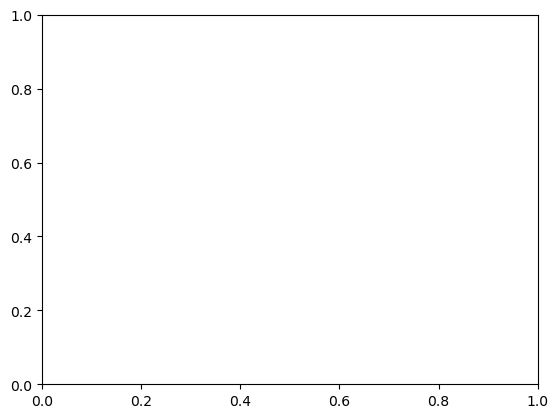

In [5]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


n = 20 # num-points
b = np.concatenate((-np.ones(int(n/2)), np.ones(int(n/2))))
a = np.array([np.zeros(n), np.zeros(n)])

for i in range(int(n/2)):
    # Weight
    a[0][i] = (15*np.random.rand()) + 30
    a[0][i+int(n/2)] = (15*np.random.rand()) + 55

    # Height
    a[1][i] = (20*np.random.rand()) + 125
    a[1][i+int(n/2)] = (25*np.random.rand()) + 155

# Function
def f(x, y, z):
    sum = 0
    for i in range(n):
        sum += math.log(1 + np.exp(-b[i]*(x*a[0][i] + y*a[1][i] + z)))
    return (1/n)*sum

def df_dx(x, y, z):
    sum = 0
    for i in range(n):
        exp_term = np.exp(-b[i]*(x*a[0][i] + y*a[1][i] + z))
        sum += (-b[i]*a[0][i]*exp_term) / (1 + exp_term)
    return (1/n)*sum

def df_dy(x, y, z):
    sum = 0
    for i in range(n):
        exp_term = np.exp(-b[i]*(x*a[0][i] + y*a[1][i] + z))
        sum += (-b[i]*a[1][i]*exp_term) / (1 + exp_term)
    return (1/n)*sum

def df_dz(x, y, z):
    sum = 0
    for i in range(n):
        exp_term = np.exp(-b[i]*(x*a[0][i] + y*a[1][i] + z))
        sum += (-b[i]*exp_term) / (1 + exp_term)
    return (1/n)*sum


### Gradient Descent ###
def gradient_descent(xinit, yinit, zinit, learning_rate, num_iterations):
    x = np.zeros(num_iterations)
    y = np.zeros(num_iterations)
    z = np.zeros(num_iterations)
    x[0] = xinit
    y[0] = yinit
    z[0] = zinit
    for i in range(1, num_iterations):
       x[i] = x[i-1] - learning_rate * df_dx(x[i-1], y[i-1], z[i-1])
       y[i] = y[i-1] - learning_rate * df_dy(x[i-1], y[i-1], z[i-1])
       z[i] = z[i-1] - learning_rate * df_dz(x[i-1], y[i-1], z[i-1])
       print(x[i])
       print(f(x[i], y[i], z[i]))
    return x, y, z

x_initial = -1
y_initial = 1
z_initial = 1
learning_rate = 0.02
num_iterations = 23

x, y, z = gradient_descent(x_initial, y_initial, z_initial, learning_rate, num_iterations)
print(f"Final values: x={x[num_iterations-1]}, y={y[num_iterations-1]}, z={z[num_iterations-1]}")

### Plotzz ###
fig, ax = plt.subplots()

def animate(i):
   ax.clear()
   for j in range(int(n/2)):
       ax.scatter(a[0][j], a[1][j], c='red')
       ax.scatter(a[0][j+int(n/2)], a[1][j+int(n/2)], c='blue')
   xplot = np.linspace(30, 70, 2)
   yplot = (-x[i]*xplot - z[i])/y[i]
   ax.plot(xplot, yplot)
   ax.set_title(f"Frame num: {i}")

ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=500, repeat=True)
plt.show()

In [ ]:

jacobian_matrix = calculate_jacobian()

# QUIZ 2

In [1]:
y_true = [1,1,0,1,0,0,1,0,1]
y_pred = [1,1,0,0,0,0,0,0,1]

from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

1.0

In [3]:
precision_score(y_pred,y_true)

0.6

In [4]:
from sklearn.linear_model import SGDClassifier

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
y_true = np.array([3, -0.5, 2,7])
y_pred = np.array([2.5, 0, 2,8])


In [12]:
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945

In [23]:
(1.5/4)**0.5

0.6123724356957945

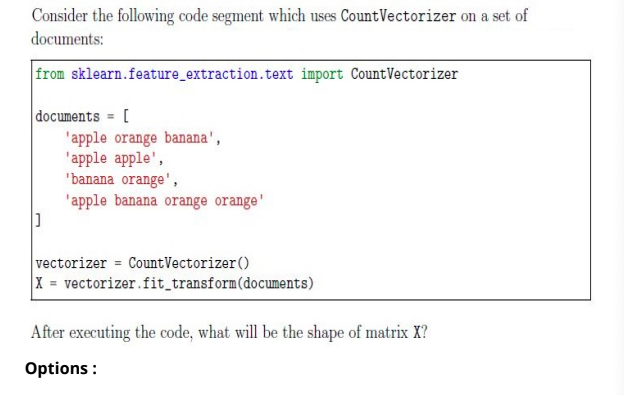

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

doc = [
    'apple orange banana',
    'apple apple',
    'banana orange',
    'apple banana orange orange'
]

vec = CountVectorizer()

X = vec.fit_transform(doc)

In [28]:
X.toarray()

array([[1, 1, 1],
       [2, 0, 0],
       [0, 1, 1],
       [1, 1, 2]])

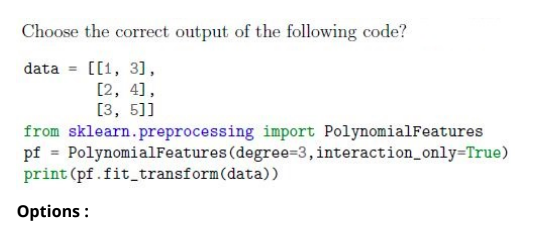

In [29]:
data = [
    [1,3],
    [2,4],
    [3,5]
]

In [33]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, interaction_only=True)

print(pf.fit_transform(data))

[[ 1.  1.  3.  3.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  5. 15.]]


In [34]:
pf = PolynomialFeatures(degree=3, interaction_only=False)

print(pf.fit_transform(data))

[[  1.   1.   3.   1.   3.   9.   1.   3.   9.  27.]
 [  1.   2.   4.   4.   8.  16.   8.  16.  32.  64.]
 [  1.   3.   5.   9.  15.  25.  27.  45.  75. 125.]]


# end term


In [24]:
corpus = ["An overfitted model is a mathematical model that contains more parameters than can be justified by the data"]
from sklearn.feature_extraction.text import CountVectorizer



In [25]:
cv = CountVectorizer()

vectors = cv.fit_transform(corpus)

In [26]:
vectors.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]])

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
PolynomialFeatures(degree=3).fit_transform([[5]])

array([[  1.,   5.,  25., 125.]])

In [32]:
from sklearn.datasets import load_wine

In [33]:
type(load_wine())

sklearn.utils._bunch.Bunch

In [35]:
type(load_wine(return_X_y=False))

sklearn.utils._bunch.Bunch

In [36]:
from sklearn.linear_model import SGDClassifier


In [ ]:
SGDClassifier(loss=)